## imports

In [11]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from os.path import join as pjoin
from tqdm import tqdm
import os

In [12]:
from skfem import *
from skfem.helpers import dot, ddot, grad, sym_grad
from skfem.models.elasticity import linear_elasticity, linear_stress

In [13]:
import imageio

In [14]:
from PIL import Image

In [15]:
from video_processing import get_first_frame

## emulate mesh

In [3]:
videopath = pjoin('..','Test1 - alecsandr27000.mkv')

image = get_first_frame(videopath=videopath)

In [4]:
frame_0 = image

In [5]:
mesh_step = (100, 100)

In [6]:
y_mesh = np.arange(300, image.shape[0]+1-300, mesh_step[0])
x_mesh = np.arange(300, image.shape[1]+1-300, mesh_step[1])

In [7]:
mesh_size = (len(y_mesh), len(x_mesh))

In [8]:
yx_mesh = np.meshgrid(x_mesh, y_mesh)
yx_mesh = np.array(yx_mesh)

In [9]:
init_vals = np.moveaxis(yx_mesh, 0, -1)

In [10]:
pos_vals = init_vals * 1.

In [11]:
yx_mesh.shape, init_vals.shape

((2, 5, 14), (5, 14, 2))

In [12]:
mesh_size

(5, 14)

In [13]:
speed_vals = np.random.random(pos_vals.shape)*20.-10.
accel_vals = np.random.random(pos_vals.shape)*12.-6.

In [14]:
video = cv2.VideoCapture(videopath)
fps = video.get(cv2.CAP_PROP_FPS)
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

In [15]:
dt = 1. / fps

In [16]:
total_frames, *list(init_vals.shape)

(323, 5, 14, 2)

In [17]:
all_pos_vals = np.zeros((total_frames, *list(init_vals.shape)))
all_pos_vals[0] = pos_vals

In [18]:
k = 0
ret, frame = video.read()
while video.isOpened():
    k += 1
    ret, frame = video.read()
    if not ret:
        break
    accel_vals += np.random.random(accel_vals.shape)-0.5
    speed_vals += accel_vals*dt
    pos_vals += speed_vals*dt
    all_pos_vals[k] = pos_vals

In [19]:
emul_dots_video_name = 'emul_dots_video.mp4'
# Разрешение изображений
frame_width, frame_height = frame_0.shape[1], frame_0.shape[0]

In [20]:
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
emul_dots_video = cv2.VideoWriter(emul_dots_video_name, fourcc, fps, (frame_width, frame_height))

In [21]:
all_pos_vals[3].shape

(5, 14, 2)

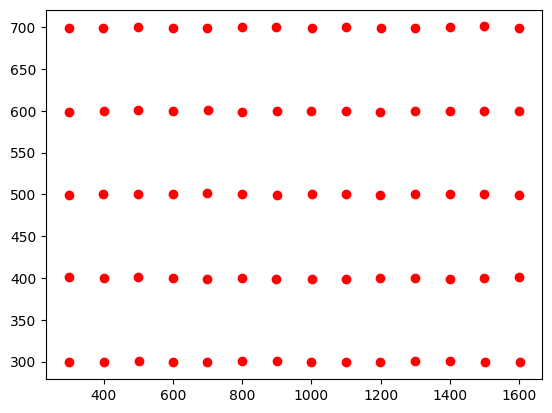

In [22]:
plt.plot(all_pos_vals[6,:,:,0], all_pos_vals[6,:,:,1], 'ro')
plt.show()
# frame_0_copy = frame_0.copy()

In [23]:
# cv2.circle(frame_0_copy, (447,63), 3, (0,0,255), -1)
# cv2.imshow('Image', frame_0_copy)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [24]:
for i in all_pos_vals[0].reshape(-1,2):
    print(i)

[300. 300.]
[400. 300.]
[500. 300.]
[600. 300.]
[700. 300.]
[800. 300.]
[900. 300.]
[1000.  300.]
[1100.  300.]
[1200.  300.]
[1300.  300.]
[1400.  300.]
[1500.  300.]
[1600.  300.]
[300. 400.]
[400. 400.]
[500. 400.]
[600. 400.]
[700. 400.]
[800. 400.]
[900. 400.]
[1000.  400.]
[1100.  400.]
[1200.  400.]
[1300.  400.]
[1400.  400.]
[1500.  400.]
[1600.  400.]
[300. 500.]
[400. 500.]
[500. 500.]
[600. 500.]
[700. 500.]
[800. 500.]
[900. 500.]
[1000.  500.]
[1100.  500.]
[1200.  500.]
[1300.  500.]
[1400.  500.]
[1500.  500.]
[1600.  500.]
[300. 600.]
[400. 600.]
[500. 600.]
[600. 600.]
[700. 600.]
[800. 600.]
[900. 600.]
[1000.  600.]
[1100.  600.]
[1200.  600.]
[1300.  600.]
[1400.  600.]
[1500.  600.]
[1600.  600.]
[300. 700.]
[400. 700.]
[500. 700.]
[600. 700.]
[700. 700.]
[800. 700.]
[900. 700.]
[1000.  700.]
[1100.  700.]
[1200.  700.]
[1300.  700.]
[1400.  700.]
[1500.  700.]
[1600.  700.]


In [25]:
video.release()
video = cv2.VideoCapture(videopath)

In [26]:
all_pos_vals[5].shape

(5, 14, 2)

In [27]:
# Чтение и запись каждого изображения в видеофайл
for i in range(k):
    ret, frame = video.read()

    src = frame.copy()

    for dot in all_pos_vals[i].reshape(-1,2):
        cv2.circle(src, dot.astype(int), 5, (0,0,255), -1)

    emul_dots_video.write(src)
    

In [28]:
emul_dots_video.release()

## градиент

In [29]:
yx_mesh.shape[1:]

(5, 14)

In [30]:
init_vals_2 = np.zeros(yx_mesh.shape[1:])*1.

In [31]:
pos_vals_2 = init_vals_2 * 1.

In [32]:
init_vals_2.shape

(5, 14)

In [33]:
speed_vals_2 = np.random.random(pos_vals_2.shape)*20.-10.
accel_vals_2 = np.random.random(pos_vals_2.shape)*12.-6.

In [34]:
video = cv2.VideoCapture(videopath)
fps = video.get(cv2.CAP_PROP_FPS)
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

In [35]:
dt = 1. / fps

In [36]:
total_frames, *list(init_vals_2.shape)

(323, 5, 14)

In [37]:
all_pos_vals_2 = np.zeros((total_frames, *list(init_vals_2.shape)))
all_pos_vals_2[0] = pos_vals_2

In [38]:
k = 0
ret, frame = video.read()
while video.isOpened():
    k += 1
    ret, frame = video.read()
    if not ret:
        break
    accel_vals_2 += np.random.random(accel_vals_2.shape)-0.5
    speed_vals_2 += accel_vals_2*dt
    pos_vals_2 += speed_vals_2*dt
    all_pos_vals_2[k] = pos_vals_2

In [39]:
emul_dots_video_name = 'emul_dots_video_2.mp4'
# Разрешение изображений
frame_width, frame_height = frame_0.shape[1], frame_0.shape[0]

In [40]:
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
emul_dots_video = cv2.VideoWriter(emul_dots_video_name, fourcc, fps, (frame_width, frame_height))

In [41]:
all_pos_vals_2[3].shape

(5, 14)

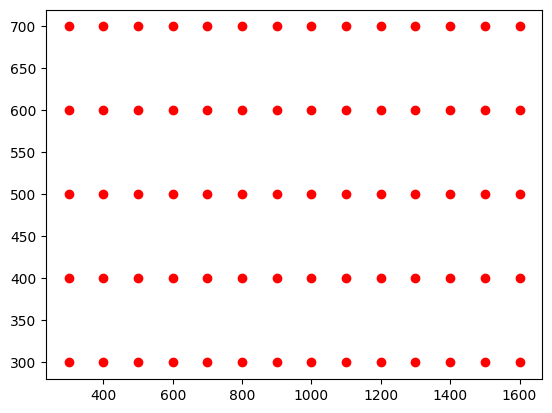

In [42]:
plt.plot(yx_mesh[0,:,:], yx_mesh[1,:,:], 'ro')
plt.show()
# frame_0_copy = frame_0.copy()

In [43]:
# cv2.circle(frame_0_copy, (447,63), 3, (0,0,255), -1)
# cv2.imshow('Image', frame_0_copy)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [44]:
video.release()
video = cv2.VideoCapture(videopath)

In [45]:
# Чтение и запись каждого изображения в видеофайл
for i in range(k):
    ret, frame = video.read()

    src = frame.copy()

    for dot in all_pos_vals_2[i].reshape(-1,2):
        cv2.circle(src, dot.astype(int), 5, (0,0,255), -1)

    emul_dots_video.write(src)
    

In [46]:
emul_dots_video.release()

## ploting

In [47]:
from matplotlib.collections import LineCollection

In [48]:
all_pos_vals[k-1].shape

(5, 14, 2)

In [49]:
def plot_grid(x,y, ax=None, **kwargs):
    ax = ax or plt.gca()
    segs1 = np.stack((x,y), axis=2)
    segs2 = segs1.transpose(1,0,2)
    ax.add_collection(LineCollection(segs1, **kwargs))
    ax.add_collection(LineCollection(segs2, **kwargs))
    ax.autoscale()

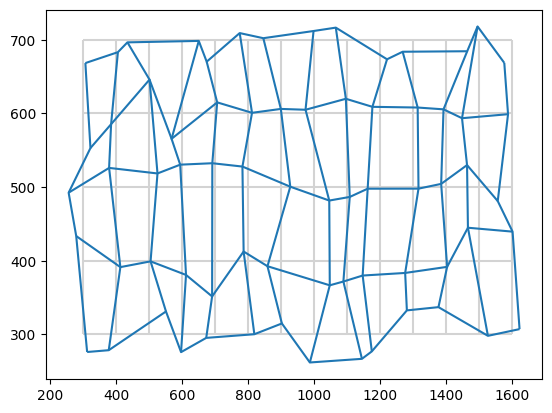

In [50]:
fig, ax = plt.subplots()

grid_x,grid_y = np.meshgrid(np.linspace(-3,3,20),np.linspace(-3,3,20))
plot_grid(init_vals[:,:,0], init_vals[:,:,1], ax=ax,  color="lightgrey")

# distx, disty = f(grid_x,grid_y)
plot_grid(all_pos_vals[k-1,:,:,0], all_pos_vals[k-1,:,:,1], ax=ax, color="C0")

plt.show()

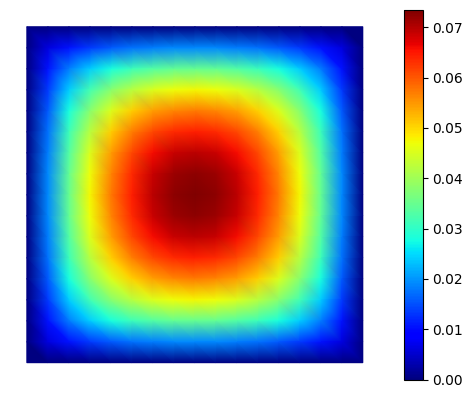

In [51]:
from skfem import *
from skfem.helpers import dot, grad

# create the mesh
mesh = MeshTri().refined(4)
# or, with your own points and elements:
# mesh = MeshTri(points, elements)

basis = Basis(mesh, ElementTriP1())

@BilinearForm
def laplace(u, v, _):
    return dot(grad(u), grad(v))

@LinearForm
def rhs(v, _):
    return 1. * v

A = laplace.assemble(basis)
b = rhs.assemble(basis)

# Dirichlet boundary conditions
A, b = enforce(A, b, D=mesh.boundary_nodes())

# solve the linear system
x = solve(A, b)

# plot using matplotlib
mesh.plot(x, shading='gouraud', colorbar=True).show()
# or, save to external file:
# mesh.save('output.vtk', point_data={'solution': x})

In [53]:
# # enable additional mesh validity checks, sacrificing performance
# import logging
# logging.basicConfig(format='%(levelname)s %(asctime)s %(name)s %(message)s')
# logging.getLogger('skfem').setLevel(logging.DEBUG)

# create the mesh
m = MeshTri().refined(6)
# or, with your own points and cells:
# m = MeshTri(points, cells)

e = ElementTriP1()
basis = Basis(m, e)

In [54]:
# this method could also be imported from skfem.models.laplace
@BilinearForm
def laplace(u, v, _):
    return dot(grad(u), grad(v))

In [55]:
# this method could also be imported from skfem.models.unit_load
@LinearForm
def rhs(v, _):
    return 1.0 * v

In [56]:
A = asm(laplace, basis)
b = asm(rhs, basis)
# or:
# A = laplace.assemble(basis)
# b = rhs.assemble(basis)

# enforce Dirichlet boundary conditions
A, b = enforce(A, b, D=m.boundary_nodes())

# solve -- can be anything that takes a sparse matrix and a right-hand side
x = solve(A, b)

In [57]:
def visualize():
    from skfem.visuals.matplotlib import plot
    return plot(m, x, shading='gouraud', colorbar=True)

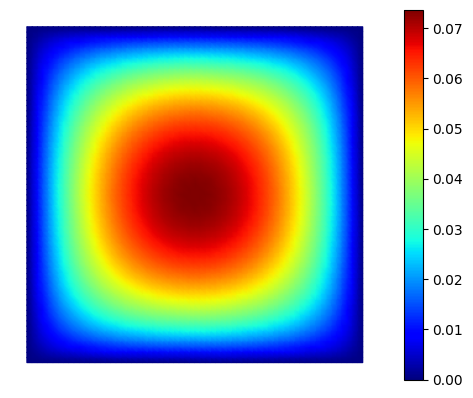

In [58]:
visualize().show()

## Linear elastic eigenvalue problem.

In [60]:
m1 = MeshLine(np.linspace(0, 5, 50))
m2 = MeshLine(np.linspace(0, 1, 10))
m = (m1 * m2).with_boundaries(
    {
        # задаём слева н.у.
        "left": lambda x: x[0] == 0.0
    }
)

In [61]:
e1 = ElementQuad1()
mapping = MappingIsoparametric(m, e1)
e = ElementVector(e1)
gb = Basis(m, e, mapping, 2)

In [62]:
lam = 1.
mu = 1.
K = asm(linear_elasticity(lam, mu), gb)

@BilinearForm
def mass(u, v, w):
    return dot(u, v)

M = asm(mass, gb)

D = gb.get_dofs("left")
y = gb.zeros()

I = gb.complement_dofs(D)

L, x = solve(*condense(K, M, I=I),
             solver=solver_eigen_scipy_sym(k=6, sigma=0.0))

y = x[:, 4]

# calculate stress
sgb = gb.with_element(ElementVector(e))
C = linear_stress(lam, mu)
yi = gb.interpolate(y)
sigma = sgb.project(C(sym_grad(yi)))

def visualize():
    from skfem.visuals.matplotlib import plot, draw
    M = MeshQuad(np.array(m.p + .5 * y[gb.nodal_dofs]), m.t)
    ax = draw(M)
    return plot(M,
                sigma[sgb.nodal_dofs[0]],
                ax=ax,
                colorbar='$\sigma_{xx}$',
                shading='gouraud')

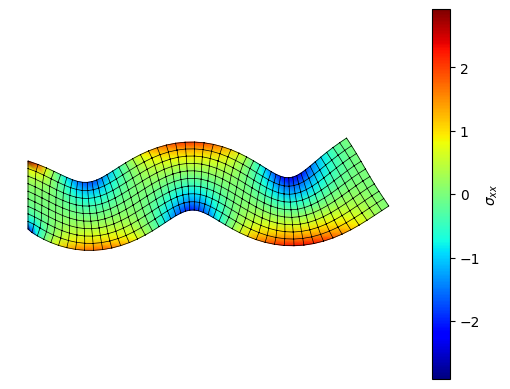

In [63]:
visualize().show()

In [64]:
m.p[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.10204082, 0.10204082, 0.10204082, 0.10204082, 0.10204082,
       0.10204082, 0.10204082, 0.10204082, 0.10204082, 0.10204082,
       0.20408163, 0.20408163, 0.20408163, 0.20408163, 0.20408163,
       0.20408163, 0.20408163, 0.20408163, 0.20408163, 0.20408163,
       0.30612245, 0.30612245, 0.30612245, 0.30612245, 0.30612245,
       0.30612245, 0.30612245, 0.30612245, 0.30612245, 0.30612245,
       0.40816327, 0.40816327, 0.40816327, 0.40816327, 0.40816327,
       0.40816327, 0.40816327, 0.40816327, 0.40816327, 0.40816327,
       0.51020408, 0.51020408, 0.51020408, 0.51020408, 0.51020408,
       0.51020408, 0.51020408, 0.51020408, 0.51020408, 0.51020408,
       0.6122449 , 0.6122449 , 0.6122449 , 0.6122449 , 0.6122449 ,
       0.6122449 , 0.6122449 , 0.6122449 , 0.6122449 , 0.6122449 ,
       0.71428571, 0.71428571, 0.71428571, 0.71428571, 0.71428

In [65]:
y[gb.nodal_dofs]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -8.91583432e-02, -2.86438259e-02,
        -1.21996448e-02, -4.65745042e-03, -1.19637471e-03,
         1.19637471e-03,  4.65745042e-03,  1.21996448e-02,
         2.86438259e-02,  8.91583432e-02, -1.34485281e-01,
        -5.54874742e-02, -2.11845761e-02, -7.50759614e-03,
        -1.74049572e-03,  1.74049572e-03,  7.50759614e-03,
         2.11845761e-02,  5.54874742e-02,  1.34485281e-01,
        -1.50867642e-01, -6.90464887e-02, -2.72925977e-02,
        -8.98743094e-03, -1.92356093e-03,  1.92356093e-03,
         8.98743094e-03,  2.72925977e-02,  6.90464887e-02,
         1.50867642e-01, -1.45314748e-01, -6.89033360e-02,
        -2.73630482e-02, -8.43207604e-03, -1.56929524e-03,
         1.56929524e-03,  8.43207604e-03,  2.73630482e-02,
         6.89033360e-02,  1.45314748e-01, -1.21528183e-0

In [66]:
my_y = np.random.random(y.shape)-0.5
my_y /= 10.

In [67]:
del visualize

In [68]:
m1 = MeshLine(np.linspace(0, 5, 50))
m2 = MeshLine(np.linspace(0, 1, 10))
m = (m1 * m2).with_boundaries(
    {
        # задаём слева н.у.
        # "left": lambda x: x[0] == 0.0
    }
)

e1 = ElementQuad1()
mapping = MappingIsoparametric(m, e1)
e = ElementVector(e1)
gb = Basis(m, e, mapping, 2)

@BilinearForm
def mass(u, v, w):
    return dot(u, v)

M = asm(mass, gb)


In [69]:
# MeshQuad1([[1,2,5,4], [1,2,5,4]])

In [70]:
# plt.plot(m.p[0], m.p[1], 'ro')

In [71]:
# gb.nodal_dofs

In [72]:
# m.p[0]

In [73]:
# m.p[1]

In [74]:
# _a = np.arange(10)
# _a[ _a.reshape(2,-1)   ]

In [75]:
my_y = gb.zeros()
my_y = np.random.random(my_y.shape)*0.1 - 0.05

In [76]:
# calculate stress
sgb = gb.with_element(ElementVector(e))
C = linear_stress(lam, mu)
my_yi = gb.interpolate(my_y)
sigma = sgb.project(C(sym_grad(my_yi)))

In [77]:
# gb.nodal_dofs.shape, m.p.shape

In [78]:
def visualize():
    from skfem.visuals.matplotlib import plot, draw
    M = MeshQuad(np.array(m.p + .5 * my_y[gb.nodal_dofs]), m.t)
    ax = draw(M)
    return plot(M,
                sigma[sgb.nodal_dofs[0]],
                ax=ax,
                colorbar='$\sigma_{xx}$',
                shading='gouraud')

In [79]:
# m.t

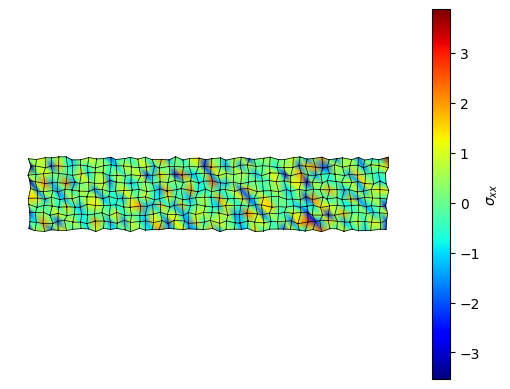

In [80]:
visualize().show()

## my mesh

In [81]:
# my_m_init = init_vals.reshape(-1, 2)
# my_m_init = MeshQuad(init_vals.reshape(-1, 2).T)

In [82]:
m1 = MeshLine(x_mesh)
m2 = MeshLine(y_mesh)
my_m_init = (m1 * m2).with_boundaries(
    {
        # задаём слева н.у.
        # "left": lambda x: x[0] == 0.0
    }
)

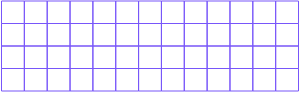

In [83]:
my_m_init

In [84]:
my_m_init.p[0] # vertical

array([ 300.,  300.,  300.,  300.,  300.,  400.,  400.,  400.,  400.,
        400.,  500.,  500.,  500.,  500.,  500.,  600.,  600.,  600.,
        600.,  600.,  700.,  700.,  700.,  700.,  700.,  800.,  800.,
        800.,  800.,  800.,  900.,  900.,  900.,  900.,  900., 1000.,
       1000., 1000., 1000., 1000., 1100., 1100., 1100., 1100., 1100.,
       1200., 1200., 1200., 1200., 1200., 1300., 1300., 1300., 1300.,
       1300., 1400., 1400., 1400., 1400., 1400., 1500., 1500., 1500.,
       1500., 1500., 1600., 1600., 1600., 1600., 1600.])

In [85]:
my_m_init.p[1] # horizontal

array([300., 400., 500., 600., 700., 300., 400., 500., 600., 700., 300.,
       400., 500., 600., 700., 300., 400., 500., 600., 700., 300., 400.,
       500., 600., 700., 300., 400., 500., 600., 700., 300., 400., 500.,
       600., 700., 300., 400., 500., 600., 700., 300., 400., 500., 600.,
       700., 300., 400., 500., 600., 700., 300., 400., 500., 600., 700.,
       300., 400., 500., 600., 700., 300., 400., 500., 600., 700., 300.,
       400., 500., 600., 700.])

In [86]:
all_pos_vals[k-1][:,:,0].T.flatten() # for my_m_init.p[0]

array([ 312.58447771,  279.50941948,  256.56532088,  322.62164311,
        307.26026235,  378.07784848,  413.21154059,  379.12455284,
        385.17547196,  405.77538233,  551.39768231,  504.72530849,
        525.69502872,  501.53096987,  434.63832526,  597.09161979,
        612.08558426,  594.49840196,  568.35554972,  650.75283614,
        673.33852069,  691.17585044,  691.77017489,  706.51587926,
        674.71238943,  819.07059278,  786.60592171,  783.01159925,
        812.04029381,  774.71919542,  902.48946896,  858.84783817,
        927.91821184,  899.35380272,  846.28798169,  987.25907467,
       1047.56987405, 1046.00198619,  974.11905303,  998.42244987,
       1145.00019639, 1088.83333777, 1108.05932046, 1096.30269656,
       1065.85218404, 1174.93597488, 1147.18779497, 1162.34642544,
       1176.69623277, 1220.9879601 , 1281.09281454, 1275.9350484 ,
       1316.31487358, 1313.80642276, 1268.37714023, 1376.78101513,
       1403.04465526, 1384.97596896, 1392.09397114, 1463.87279

In [94]:
all_pos_vals[k-1][:,:,1].T.flatten() # for my_m_init.p[1]

array([276.23615448, 433.59521804, 492.43919826, 553.02010986,
       668.36228396, 278.68643866, 391.43368882, 526.08170772,
       585.40790889, 683.15618921, 331.2465771 , 399.24972546,
       518.55233289, 645.9179639 , 696.47347444, 276.05939937,
       380.84425211, 530.47818137, 565.55344186, 698.42493215,
       295.40322623, 351.65246711, 532.43560737, 615.01167314,
       670.22407585, 300.35645274, 412.59566101, 527.90300655,
       600.85194116, 709.06423084, 314.96968152, 392.66114813,
       500.59453777, 606.12775189, 702.11780927, 262.02182221,
       366.75027831, 481.77810758, 604.99778552, 711.8662391 ,
       266.96795032, 371.88714578, 486.67564   , 619.87957272,
       716.45810196, 277.06194445, 380.00451291, 497.86049186,
       608.97407905, 673.49359849, 332.71115328, 383.52808989,
       497.94142479, 608.01869793, 683.73414405, 337.11989441,
       391.78375981, 504.39335462, 605.56644487, 684.41205373,
       298.18768818, 444.89219404, 529.91606706, 593.52

In [95]:
idx = k-1

In [96]:
y_last = np.dstack([all_pos_vals[idx][:,:,0].T.flatten(), all_pos_vals[idx][:,:,1].T.flatten()])

In [99]:
# y_last.flatten()[gb.nodal_dofs]

In [100]:
y_last = y_last.flatten()

In [101]:
y_init = np.dstack([my_m_init.p[0].T.flatten(), my_m_init.p[1].T.flatten()])

In [102]:
# y_init.flatten()[gb.nodal_dofs]

In [103]:
y_init = y_init.flatten()

In [104]:
my_y = y_last - y_init

In [105]:
e1 = ElementQuad1()
mapping = MappingIsoparametric(my_m_init, e1)
e = ElementVector(e1)
gb = Basis(my_m_init, e, mapping, 2)

@BilinearForm
def mass(u, v, w):
    return dot(u, v)

M = asm(mass, gb)

In [106]:
lam = 1.
mu = 1.
# calculate stress
sgb = gb.with_element(ElementVector(e))
C = linear_stress(lam, mu)
my_yi = gb.interpolate(my_y)
sigma = sgb.project(C(sym_grad(my_yi)))

In [107]:
def visualize():
    from skfem.visuals.matplotlib import plot, draw
    M = MeshQuad(np.array(my_m_init.p + .5 * my_y[gb.nodal_dofs]), my_m_init.t)
    ax = draw(M)
    return plot(M,
                sigma[sgb.nodal_dofs[0]],
                ax=ax,
                colorbar='$\sigma_{xx}$',
                shading='gouraud')

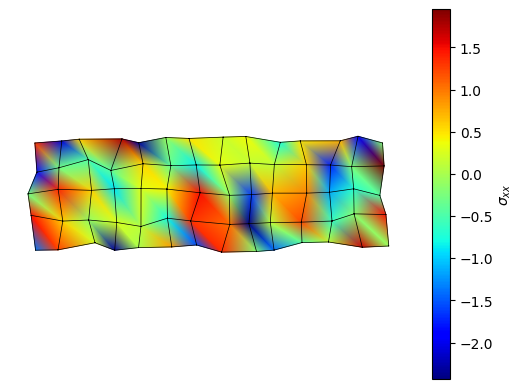

In [125]:
res = visualize()
plt.savefig('fooo.png')

In [ ]:
image_data = plt.gcf().canvas.tostring_rgb()

# Set the image data on the image object
image.frombytes(image_data)

# Access the image object as an array-like structure
image_array = image.load()

# Do something with the image array, such as accessing pixel values or saving it to a file

# Save the image object to a file
image.save('image.png')

## saving all pictures

In [150]:
if not os.path.exists('mesh_pics'):
    os.makedirs('mesh_pics')

In [152]:
for idx in range(k):
    m1 = MeshLine(x_mesh)
    m2 = MeshLine(y_mesh)
    my_m_init = (m1 * m2).with_boundaries(
        {
            # задаём слева н.у.
            # "left": lambda x: x[0] == 0.0
        }
    )
    y_last = np.dstack([all_pos_vals[idx][:,:,0].T.flatten(), all_pos_vals[idx][:,:,1].T.flatten()])
    y_last = y_last.flatten()
    y_init = np.dstack([my_m_init.p[0].T.flatten(), my_m_init.p[1].T.flatten()])
    y_init = y_init.flatten()
    my_y = y_last - y_init
    e1 = ElementQuad1()
    mapping = MappingIsoparametric(my_m_init, e1)
    e = ElementVector(e1)
    gb = Basis(my_m_init, e, mapping, 2)

    @BilinearForm
    def mass(u, v, w):
        return dot(u, v)

    M = asm(mass, gb)
    lam = 1.
    mu = 1.
    # calculate stress
    sgb = gb.with_element(ElementVector(e))
    C = linear_stress(lam, mu)
    my_yi = gb.interpolate(my_y)
    sigma = sgb.project(C(sym_grad(my_yi)))
    def visualize():
        from skfem.visuals.matplotlib import plot, draw
        M = MeshQuad(np.array(my_m_init.p + .5 * my_y[gb.nodal_dofs]), my_m_init.t)
        ax = draw(M)
        return plot(M,
                    sigma[sgb.nodal_dofs[0]],
                    ax=ax,
                    colorbar='$\sigma_{xx}$',
                    shading='gouraud')
    res = visualize()
    plt.savefig(pjoin('mesh_pics', f'foo_{idx}.png'))
    plt.close()

In [155]:
frames = []
for idx in range(k):
    image = imageio.v2.imread(pjoin('mesh_pics', f'foo_{idx}.png'))
    frames.append(image)

In [156]:
imageio.mimsave('./example.gif', frames, duration= (1000 * 1/50))

In [159]:
if not os.path.exists('mesh_pics_2'):
    os.makedirs('mesh_pics_2')

In [160]:
for idx in range(k):
    m1 = MeshLine(x_mesh)
    m2 = MeshLine(y_mesh)
    my_m_init = (m1 * m2).with_boundaries(
        {
            # задаём слева н.у.
            # "left": lambda x: x[0] == 0.0
        }
    )
    y_last = np.dstack([all_pos_vals[idx][:,:,0].T.flatten(), all_pos_vals[idx][:,:,1].T.flatten()])
    y_last = y_last.flatten()
    y_init = np.dstack([my_m_init.p[0].T.flatten(), my_m_init.p[1].T.flatten()])
    y_init = y_init.flatten()
    my_y = y_last - y_init
    e1 = ElementQuad1()
    mapping = MappingIsoparametric(my_m_init, e1)
    e = ElementVector(e1)
    gb = Basis(my_m_init, e, mapping, 2)

    @BilinearForm
    def mass(u, v, w):
        return dot(u, v)

    M = asm(mass, gb)
    lam = 1.
    mu = 1.
    # calculate stress
    sgb = gb.with_element(ElementVector(e))
    C = linear_stress(lam, mu)
    my_yi = gb.interpolate(my_y)
    sigma = sgb.project(C(sym_grad(my_yi)))
    def visualize():
        from skfem.visuals.matplotlib import plot, draw
        M = MeshQuad(np.array(my_m_init.p + .5 * my_y[gb.nodal_dofs]), my_m_init.t)
        ax = draw(M)
        return plot(M,
                    sigma[sgb.nodal_dofs[1]],
                    ax=ax,
                    colorbar='$\sigma_{ъъ}$',
                    shading='gouraud')
    res = visualize()
    plt.savefig(pjoin('mesh_pics_2', f'foo_{idx}.png'))
    plt.close()

In [161]:
frames = []
for idx in range(k):
    image = imageio.v2.imread(pjoin('mesh_pics_2', f'foo_{idx}.png'))
    frames.append(image)

In [162]:
imageio.mimsave('./example_2.gif', frames, duration= (1000 * 1/50))

## calc on actual pos

In [16]:
all_pos_vals_actual = np.load(pjoin('actual pos', 'all_pos_vals.npy'))
all_ui_vals_actual = np.load(pjoin('actual pos', 'all_ui_vals.npy'))

In [17]:
all_pos_vals_actual[0].T.shape

(2, 2500)

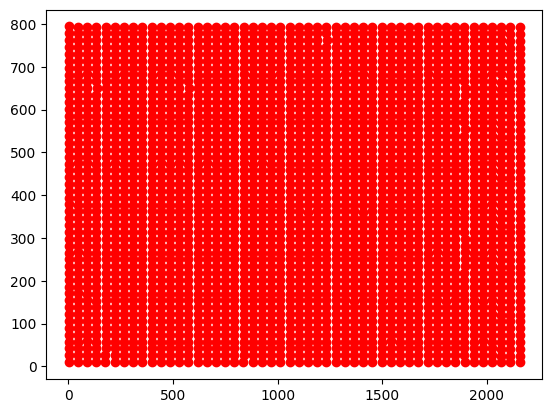

In [22]:
plt.plot(all_pos_vals_actual[0].T[0], all_pos_vals_actual[0].T[1], 'ro')
plt.show()

In [31]:
min(all_pos_vals_actual[0].T[0]), max(all_pos_vals_actual[0].T[0])

(0.9537582397460938, 2157.0)

In [33]:
# MeshQuad([all_pos_vals_actual[0].T[0], all_pos_vals_actual[0].T[1]])
MeshTet([[0.5,1,1,0], [1,1,0.5,0]])

IndexError: index 4 is out of bounds for axis 1 with size 4